In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Año': [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Federación de Rusia': [4.427032321, 4.181324647, 4.523700655, 3.784429967, 3.756558821, 4.039809297, 2.732649089, 3.073287922, 3.307029837, 3.546319229, 3.756277391, 3.67083809, 3.300353647, 3.331237234, 3.246357234, 3.118542075, 3.14948602, 3.924063403, 3.58508572, 3.433043838, 3.689240435, 3.854042583, 4.112992978, 4.871514747, 5.425147705, 4.248996052, 3.71982244, 3.860337504, 4.171478901, 3.720451365, 4.056316332],
    'Ucrania': [0.318087308, 0.352352877, 1.798340267, 2.035957432, 2.190786309, 2.79497911, 2.105981713, 1.900756188, 2.151049237, 1.886871078, 1.984684246, 2.124209046, 1.9670586, 2.405748995, 2.387745638, 2.472527403, 2.302741144, 1.908981904, 1.902361022, 1.533641241, 1.613319917, 1.579291679, 2.245020521, 3.251180763, 3.154776603, 2.884401519, 3.192353265, 3.520152416, 3.811849481, 3.228346937, 33.546573]
}

# Convertir los datos a un DataFrame
df = pd.DataFrame(data)

# Calcular las razones de cambio anual para cada país (diferencia de años)
df['dFederación de Rusia'] = df['Federación de Rusia'].diff()
df['dUcrania'] = df['Ucrania'].diff()

# Mostrar las primeras filas para verificar
print(df.head())


    Año  Federación de Rusia   Ucrania  dFederación de Rusia  dUcrania
0  1992             4.427032  0.318087                   NaN       NaN
1  1993             4.181325  0.352353             -0.245708  0.034266
2  1994             4.523701  1.798340              0.342376  1.445987
3  1995             3.784430  2.035957             -0.739271  0.237617
4  1996             3.756559  2.190786             -0.027871  0.154829


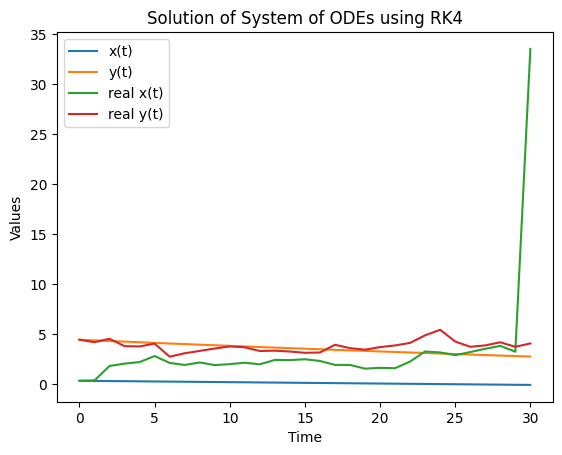

In [21]:
import numpy as np
import matplotlib.pyplot as plt

a, b = coef_rusia  # Coeficientes de la pendiente para Rusia
c = intercept_rusia  # Término independiente para Rusia
q, r = coef_ucrania  # Coeficientes de la pendiente para Ucrania
s = intercept_ucrania  # Término independiente para Ucrania

# Define the system of ODEs
def system(x, y):
    dxdt = -a * b * y + c  # Example ODE for x
    dydt = q * x - r * y + s # Example ODE for y
    return dxdt, dydt

# Define the RK4 step function
def rk4_step(system, x, y, dt):
    k1_x, k1_y = system(x, y)
    k1_x=k1_x*dt
    k1_y=k1_y*dt
    k2_x, k2_y = system(x + 0.5 * k1_x * dt, y + 0.5 * k1_y * dt)
    k2_x=k2_x*dt
    k2_y=k2_y*dt
    k3_x, k3_y = system(x + 0.5 * k2_x * dt, y + 0.5 * k2_y * dt)
    k3_x=k3_x*dt
    k3_y=k3_y*dt
    k4_x, k4_y = system(x + k3_x * dt, y + k3_y * dt)
    k4_x=k4_x*dt
    k4_y=k4_y*dt

    x_next = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    y_next = y + (dt / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
    
    return x_next, y_next

# Initial conditions
t0 = 0.0
x0, y0 = 0.318087308, 4.427032321  # Starting values for x and y
dt = 0.01          # Time step
t_max = 30.0       # End time

# Time points and storage for results
times = np.arange(t0, t_max, dt)
x_values = [x0]
y_values = [y0]

# Iterate using RK4
x, y = x0, y0
for t in times[:-1]:
    x, y = rk4_step(system, x, y, dt)
    x_values.append(x)
    y_values.append(y)

# Plot results
xreal = [0.318087308,
0.352352877,
1.798340267,
2.035957432,
2.190786309,
2.79497911,
2.105981713,
1.900756188,
2.151049237,
1.886871078,
1.984684246,
2.124209046,
1.9670586,
2.405748995,
2.387745638,
2.472527403,
2.302741144,
1.908981904,
1.902361022,
1.533641241,
1.613319917,
1.579291679,
2.245020521,
3.251180763,
3.154776603,
2.884401519,
3.192353265,
3.520152416,
3.811849481,
3.228346937,
33.546573]
yreal=[4.427032321,
4.181324647,
4.523700655,
3.784429967,
3.756558821,
4.039809297,
2.732649089,
3.073287922,
3.307029837,
3.546319229,
3.756277391,
3.67083809,
3.300353647,
3.331237234,
3.246357234,
3.118542075,
3.14948602,
3.924063403,
3.58508572,
3.433043838,
3.689240435,
3.854042583,
4.112992978,
4.871514747,
5.425147705,
4.248996052,
3.71982244,
3.860337504,
4.171478901,
3.720451365,
4.056316332]
treal = np.arange(0,31)

plt.plot(times, x_values, label='x(t)')
plt.plot(times, y_values, label='y(t)')
plt.plot(treal, xreal, label="real x(t)")
plt.plot(treal, yreal, label="real y(t)")
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title("Solution of System of ODEs using RK4")
plt.show()